# Exploratory Data Analysis

This step involves the following:

>1.[Import and Read data](#Import-and-Read-data)<br>
>2.[Data Dictionary](#Data-Dictionary)<br>
>3.[Data Visualization](#Data-Visualization)<br>



## Import and Read data

In [0]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Code:
# reading the csv file into pandas dataframes
df=pd.read_csv('/content/gdrive/My Drive/DSI/data-science-bowl-2019/train.csv')
score=pd.read_csv('/content/gdrive/My Drive/DSI/data-science-bowl-2019/train_labels.csv')


In [7]:
#displaying the dimensions of dataframe 
print(df.shape)
print(score.shape)

(11341042, 11)
(17690, 7)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [9]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


In [10]:
#displaying the first 5 rows of dataframe -df
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [11]:
#displaying the first 5 rows of dataframe -score
score.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


## Data Dictionary

### Dataframe-df



|Feature|Type|Description|
|---|---|---|
|event_id|object|Randomly generated unique identifier for the event type|
|game_session|object|Randomly generated unique identifier grouping events within a single game or video play session|
|timestamp|object|Client-generated datetime|
|event_data|object|Semi-structured JSON formatted string containing the event parameters|
|installation_id|object|Randomly generated unique identifier grouping game sessions within a single installed application instance|
|event_count|int64|Incremental counter of events within a game session (offset at 1)|
|event_code|int64| Unique Identifier per game, but duplicated across games|
|game_time|int64|Time in milliseconds since the start of the game session|
|title|object|Title of the section|
|type|object|Media type of the section|
|world|object|Main section of application|

### Dataframe-Score

|Feature|Type|Description|
|---|---|---|
|game_session|object|Randomly generated unique identifier for the event type|
|installation_id|object|Randomly generated unique identifier grouping game sessions within a single installed application instance|
|title|object|Title of assessment|
|num_correct|int64|Number of attempt made to complete the assessment|
|num_incorrect|int64|Number of incorrect attempt made to complete the assessment|
|accuracy|float64|Calulated based on num_correct and num_incorrect|
|accuracy_group|int64|Outcomes in this competition are grouped into 4 groups|


## Data Visualization

In [0]:
# renaming the columns 'type' into 'section' as it is a keyword
df = df.rename(columns={'type': 'section'})

In [0]:
# converting date column to datetime type
df['timestamp']=pd.to_datetime(df['timestamp'])
df['year'] = pd.to_datetime(df['timestamp']).dt.year
df['month'] = pd.to_datetime(df['timestamp']).dt.month
df['day'] = pd.to_datetime(df['timestamp']).dt.day

In [15]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,section,world,year,month,day
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019,9,6
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019,9,6


In [16]:
# installation_id corresponds to number of users
df['installation_id'].nunique()

17000

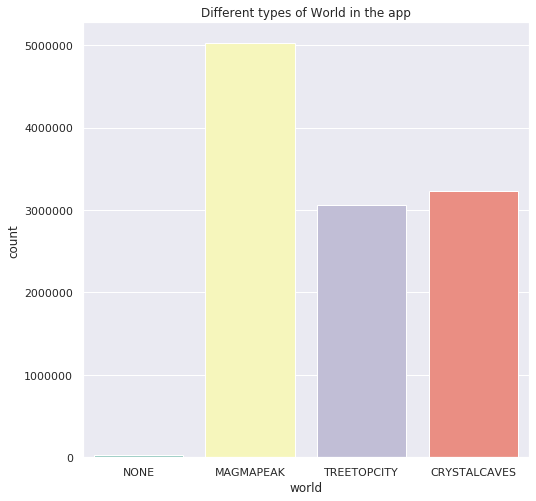

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.countplot(df['world'],palette="Set3")
plt.title('Different types of World in the app');
# different types of world in df


There are three different sections in this app.
None is not a section ,it means introduction to app

In [18]:
# different kinds of sections in each world
df.groupby('world').section.unique()

world
CRYSTALCAVES    [Clip, Game, Activity, Assessment]
MAGMAPEAK       [Clip, Activity, Game, Assessment]
NONE            [Clip]                            
TREETOPCITY     [Clip, Game, Activity, Assessment]
Name: section, dtype: object

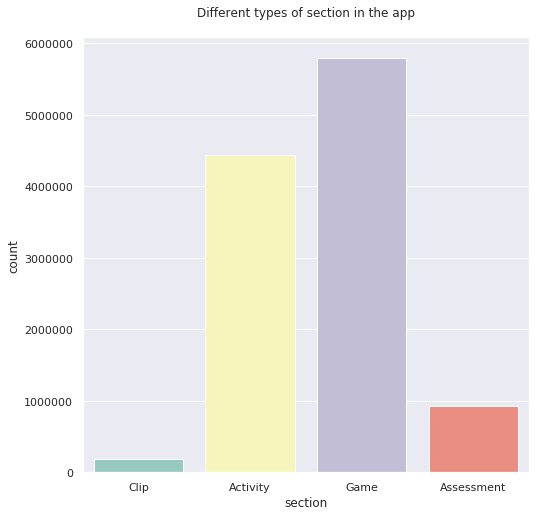

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.countplot(df['section'],palette="Set3")
plt.title('Different types of section in the app\n');

Each world has combinations of these four sections.

In [20]:
# different lessons in each world
df.groupby('world').title.unique()

world
CRYSTALCAVES    [Crystal Caves - Level 1, Chow Time, Balancing Act, Crystal Caves - Level 2, Crystal Caves - Level 3, Chicken Balancer (Activity), Lifting Heavy Things, Pan Balance, Happy Camel, Honey Cake, Cart Balancer (Assessment), Heavy, Heavier, Heaviest, Egg Dropper (Activity), Chest Sorter (Assessment), Leaf Leader]                      
MAGMAPEAK       [Magma Peak - Level 1, Sandcastle Builder (Activity), Scrub-A-Dub, Magma Peak - Level 2, Dino Drink, Watering Hole (Activity), Slop Problem, Bubble Bath, Bottle Filler (Activity), Dino Dive, Cauldron Filler (Assessment)]                                                                                                              
NONE            [Welcome to Lost Lagoon!]                                                                                                                                                                                                                                                                   

In [21]:
# event_code corresponds to action done by user
df.groupby('title').event_code.nunique().sort_values()

title
12 Monkeys                       1 
Tree Top City - Level 3          1 
Tree Top City - Level 2          1 
Tree Top City - Level 1          1 
Treasure Map                     1 
Slop Problem                     1 
Rulers                           1 
Pirate's Tale                    1 
Ordering Spheres                 1 
Magma Peak - Level 2             1 
Magma Peak - Level 1             1 
Lifting Heavy Things             1 
Honey Cake                       1 
Heavy, Heavier, Heaviest         1 
Crystal Caves - Level 3          1 
Welcome to Lost Lagoon!          1 
Crystal Caves - Level 1          1 
Balancing Act                    1 
Crystal Caves - Level 2          1 
Costume Box                      1 
Fireworks (Activity)             8 
Egg Dropper (Activity)           9 
Bug Measurer (Activity)          9 
Flower Waterer (Activity)        10
Chicken Balancer (Activity)      10
Watering Hole (Activity)         11
Sandcastle Builder (Activity)    11
Bottle Filler (Activit

In [22]:
df['year'].unique() # data is collected for the year-2019

array([2019])

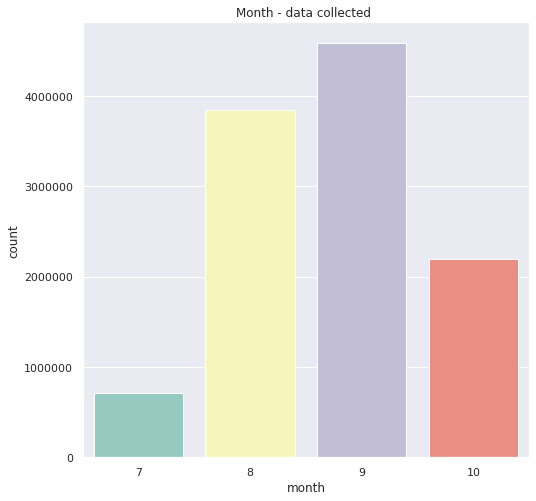

In [23]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.countplot(df['month'],palette="Set3")
plt.title('Month - data collected ');

Month on which the gameplay log was collected.

In [24]:
df.groupby('month').day.unique() # days of month on which data was collected

month
7     [31, 28, 30, 26, 24, 27, 25, 29, 23]                                                                               
8     [6, 9, 29, 24, 26, 25, 20, 21, 27, 1, 2, 10, 18, 7, 8, 12, 5, 28, 14, 30, 23, 22, 13, 15, 17, 11, 4, 16, 19, 31, 3]
9     [6, 13, 14, 20, 11, 4, 22, 5, 10, 7, 8, 12, 26, 27, 30, 19, 29, 9, 15, 16, 25, 28, 17, 18, 1, 23, 24, 2, 3, 21]    
10    [11, 1, 10, 5, 6, 12, 13, 9, 2, 3, 8, 4, 7, 14, 22]                                                                
Name: day, dtype: object

In [25]:
# number of installation_id(number of users) for each assessment
score.groupby('title').installation_id.nunique()

title
Bird Measurer (Assessment)      1587
Cart Balancer (Assessment)      2100
Cauldron Filler (Assessment)    1985
Chest Sorter (Assessment)       1724
Mushroom Sorter (Assessment)    1990
Name: installation_id, dtype: int64

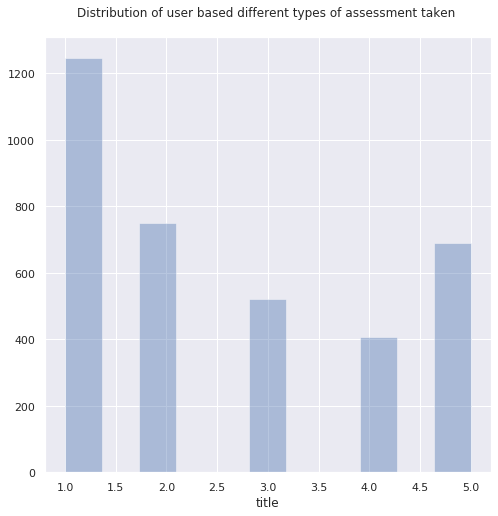

In [26]:

sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
ax=sns.distplot(score.groupby('installation_id').title.nunique(),kde=False)
plt.title('Distribution of number of assessment  \n');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

This app has 5 assessments in total.The above graph shows the number of users based on the number of assessments taken.

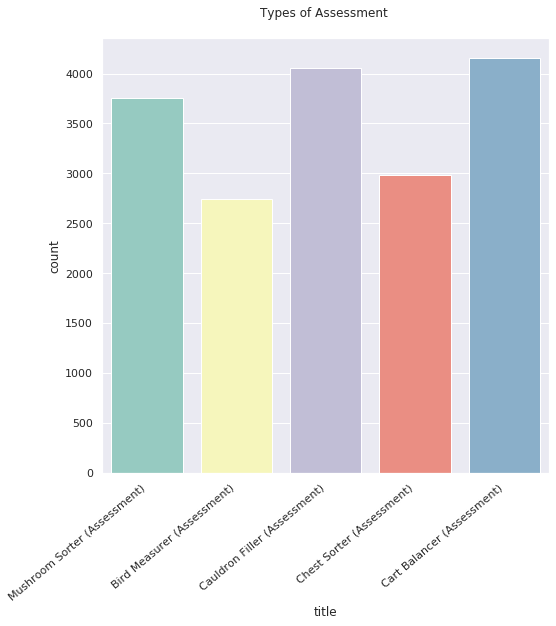

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
ax=sns.countplot(score['title'],palette="Set3")
plt.title('Types of Assessment \n');
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

The above graph shows the different types of assessment in this app for which the accuracy_group(grades) are specified in dataset

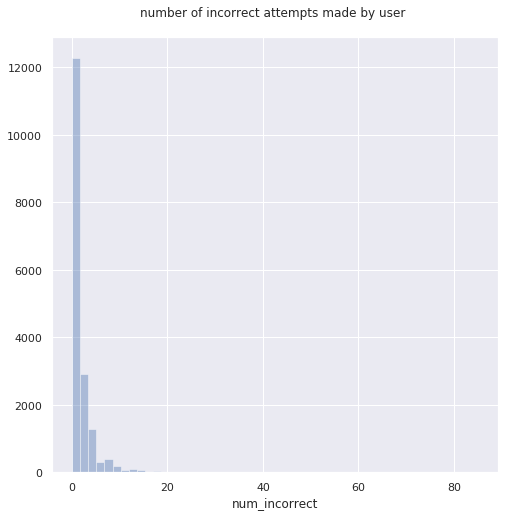

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
ax=sns.distplot(score['num_incorrect'],kde=False,bins=50)
plt.title('number of incorrect attempts made by user \n');

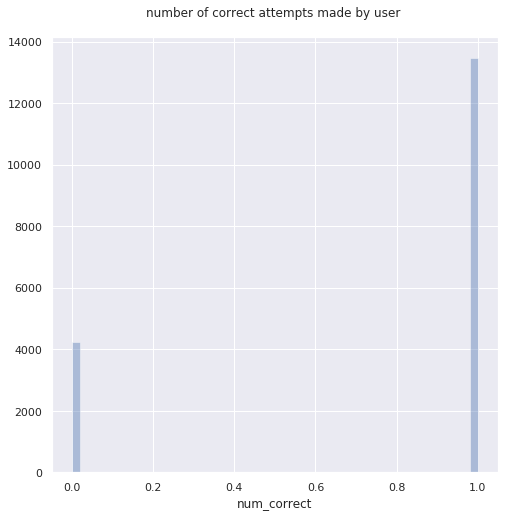

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
ax=sns.distplot(score['num_correct'],kde=False,bins=50)
plt.title('number of correct attempts made by user \n');

***Most of the students got it correct in their first attempt***

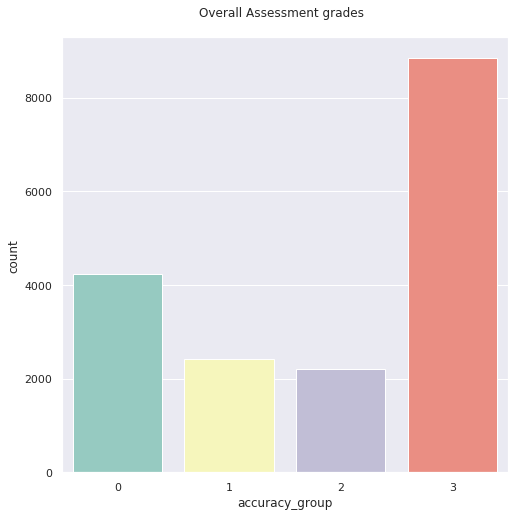

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
ax=sns.countplot(score['accuracy_group'],palette="Set3")
plt.title('Overall Assessment grades  \n');

There are 4 accuracy group<br>
3: the assessment was solved on the first attempt<br>
2: the assessment was solved on the second attempt<br>
1: the assessment was solved after 3 or more attempts<br>
0: the assessment was never solved<br>

In [34]:
#possible accuracy_group(grade) value in each assessment 
score.groupby('title').accuracy_group.unique()

title
Bird Measurer (Assessment)      [0, 3, 2, 1]
Cart Balancer (Assessment)      [3, 0, 2, 1]
Cauldron Filler (Assessment)    [3, 1, 2, 0]
Chest Sorter (Assessment)       [0, 2, 3, 1]
Mushroom Sorter (Assessment)    [3, 2, 0, 1]
Name: accuracy_group, dtype: object